##System check

In [1]:
import sys
osx = sys.platform 

##Directory change

In [2]:
import os
if(osx == "win32"):
    try:
        os.chdir('C:\Users\dhrre\Desktop\Projects\Handwriting_recognition_using_neural_nets_on_FPGA\Image processing')
    except WindowsError:
        os.chdir('Copy paste Ranas path here')
else:
    print("OSX ERROR")
os.getcwd()

'C:\\Users\\dhrre\\Desktop\\Projects\\Handwriting_recognition_using_neural_nets_on_FPGA\\Image processing'

##Imports and setup

In [3]:
import numpy as np
from IPython.display import Image
import matplotlib
from matplotlib.pyplot import imshow
from PIL import Image
import copy

##Class=> image_processing

In [4]:
class image_processing() : 
    
    def __init__(self) : 
        pass
    
    def rgb_to_greyscale(self,image) : 
        return_image = []
        for row in image : 
            return_image.append([])
            for pixel in row :
                try:
                    [r,g,b,s] = pixel
                except ValueError:
                    [r,g,b] = pixel
                return_image[-1].append(np.uint8((int(r)+int(g)+int(b))/3))
        return np.array(return_image)
    def rgb_to_bnw(image,threshold = 200,numpy_array = False) : 
        return_image = []
        for row in image : 
            return_image.append([])
            for pixel in row :
                try:
                    [r,g,b,s] = pixel
                except ValueError:
                    [r,g,b] = pixel
                magnitude= (int(r)+int(g)+int(b))/3
                if(magnitude < threshold) : 
                    return_image[-1].append(1)
                else:
                    return_image[-1].append(255)
        if(numpy_array):
            return np.array(return_image)
        else:
            return return_image

##Display function

In [5]:
def display(image) : 
    if type(image) is type([]) : 
        i = len(image)*100 + 11
        for images in image:
            matplotlib.pyplot.subplot(i)
            imshow(images,cmap=matplotlib.pyplot.get_cmap('gray'))
            i = i+1
    else : 
        % matplotlib inline
        imshow(image,cmap=matplotlib.pyplot.get_cmap('gray'))

##Original Image Display

In [7]:
image = np.array(Image.open('data_set_collection_related_images\TE_ELEX_008__1_0.png')) 

#imshow(image,cmap=matplotlib.pyplot.get_cmap('grey'))
impr = image_processing()
image = impr.rgb_to_bnw(image,numpy_array = True)

display(image)


TypeError: iteration over non-sequence

## Full convolution

In [7]:
def full_convolution(self,image,*args):
    all_kernels = list(args)
#     print(all_kernels)

    image_width = len(image[0])
    image_height = len(image)
    
    
    def element_wise_matrix_multiplication(matrix1,matrix2,scaling_factor=1) :
        return_value = 0
        for m1_row,m2_row in zip(matrix1,matrix2) :
            for m1_pixel,m2_pixel in zip(m1_row,m2_row) :
                return_value += int(m1_pixel)*int(m2_pixel)
        return np.uint8(return_value/scaling_factor)
    
    def slice_and_multiply(image,kernel,scaling_factor):
        
        [kernel_width,kernel_height] = [len(kernel[0]),len(kernel)]
        
        return_image = []
        for row in range(image_height - kernel_height + 1) :
            return_image.append([])
            for pixel in range(image_width - kernel_width + 1) :
                image_slice = [[image[i,j] for j in range(pixel,pixel + kernel_width)] for i in range(row,row + kernel_height)]
                #print(image_slice)
                return_image[-1].append(element_wise_matrix_multiplication(image_slice,kernel,scaling_factor))
        return np.array(return_image)
    
    def slice_and_multiply_together(image,all_kernels):
        full_kernel = all_kernels[1]
        kernel = full_kernel[1]
        [kernel_width,kernel_height] = [len(kernel[0]),len(kernel)]
        
        return_image = []
        for row in range(image_height - kernel_height + 1) :
            return_image.append([])
            for pixel in range(image_width - kernel_width + 1) :
                image_slice = [[image[i,j] for j in range(pixel,pixel + kernel_width)] for i in range(row,row + kernel_height)]
                #print(image_slice)
                temp = 0
                for full_kernel in all_kernels:
                    kernel = full_kernel[1]
                    temp = np.uint8(temp|element_wise_matrix_multiplication(image_slice,kernel,full_kernel[0]))
                return_image[-1].append(temp)
        return np.array(return_image)
    
    full_kernel = all_kernels[0]
    
    kernel = full_kernel[1]

#     kernel_width = len(kernel[0])
#     kernel_height = len(kernel)
  
    kernel_specs = [len(kernel[0]),len(kernel)]                                #[kernel_width,kernel_height]
    
    if(len(all_kernels) >1):
        for full_kernel in all_kernels[1:]:
            kernel = full_kernel[1]
            kernel_specs_ = [len(kernel[0]),len(kernel)]                        #[kernel_width,kernel_height]
            if(kernel_specs == kernel_specs_):
                flag = 1
#                 print ("flag recvd 1")
            else:
                flag = 0
#                 print ("flag recvd 0")
                break
        if flag == 0:
#             print ("entering one-kernel-at-a-time mode")
            temp = []
            for full_kernel in all_kernels:
#                 print(full_kernel)
#                 print(full_kernel[1])
                im = slice_and_multiply(image,full_kernel[1],full_kernel[0])      #image, kernel, scaling_factor
#                 print("----")
                temp.append(im)
            return(temp)
        if flag ==1:
#             print("entering all-kernels-together-mode")
            im = slice_and_multiply_together(image,all_kernels)       #image, all_kernels
            return(im)
    else:
#         print("just 1 kernel")
        return slice_and_multiply(image,full_kernel[1],full_kernel[0])             #image, kernel, scaling_factor

image_processing.full_convolution = full_convolution

##Smoothening the image or applying gaussian_filter

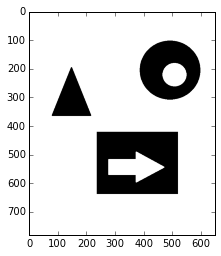

In [8]:
def gaussian_filter(self,image) : 
    kernel = [273,[[1,4 ,7 ,4 ,1],
                [4,16,26,16,4],
                [7,26,41,26,7],
                [4,16,26,16,4],
                [1,4 ,7 ,4 ,1]]]
    processed_image = self.full_convolution(image,kernel)
    return processed_image

image_processing.gaussian_filter = gaussian_filter
impr = image_processing()
im = impr.gaussian_filter(image)
display(im)
image = im

#complete_edge_full_convolution

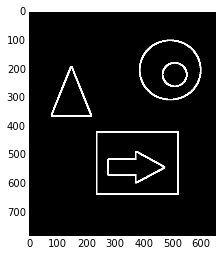

In [9]:
def complete_edge_full_convolution(self,image) : 
    kernel1 = [1,[[-1,0,1],
                 [-1,0,1],
                 [-1,0,1]]]
    kernel2 = [1,[[1,0,-1],
                 [1,0,-1],
                 [1,0,-1]]]
    kernel3 = [1,[[-1,-1,-1],
                 [0,0,0],
                 [1,1,1]]]
    kernel4 = [1,[[1,1,1],
                 [0,0,0],
                 [-1,-1,-1]]]
    processed_image = self.full_convolution(image,kernel1,kernel2,kernel3,kernel4)
    return processed_image

image_processing.complete_edge_full_convolution = complete_edge_full_convolution

impr = image_processing()
im = impr.complete_edge_full_convolution(image)
display(im)

In [10]:
image = im
im = image

#Segmentation:

##Transpose Function

In [8]:
def transpose(image):
    temp = []
    for i in range(len(image[0])):
        temp.append([])
        for j in range(len(image)):
            temp[-1].append(image[j][i])
    return np.array(temp)

##Check_row_for_obstruction function

In [9]:
def check_row_for_obstruction(im,row,mode=1):
    im_slice = im[row]
    k = im_slice[0]
    for i in range(1,len(im_slice)):
        if(k != im_slice[i]):
            return (mode==1)
    else:
        return (mode!=1)

##Sweep function

In [10]:
def sweep(image,image_,mode,x1=0):
    if(mode==1):   #Right to left sweep
        for i in range(len(image_)):
            if(check_row_for_obstruction(image_,i)):
                break
        else:
            return True   ## Returns true to show scanning is complete without any obstacles
        return i
    if(mode==2):   #Up to down sweep
        for i in range(len(image)):
            if(check_row_for_obstruction(image,i)):
                break
        else:
            print("thenga 2")
        return i
    if(mode==3):   #Down to up sweep
        for i in range(len(image)):
            if(check_row_for_obstruction(image,len(image)-1-i)):
                break
        else:
            print("thenga 3")
        return len(image)-1-i
    if(mode==4):   #Left to right sweep
        for i in range(x1,len(image_)):
            if(check_row_for_obstruction(image_,i,2)):
                break
        else:
            print("thenga 4")
        return i-1

##Scale_and_border function

In [11]:
def scale_and_border(im):
    border = 20
#     SCALING AND BORDERING LEFT----------------------------------------------------------
    w = len(im)
    h = len(im[0])
    return(im)

##Crop_out function

In [15]:
def crop_out(image,obj_dim):
    border = 5
    obj_dim = [obj_dim[0]-border,obj_dim[1]+border,obj_dim[2]-border,obj_dim[3]+border]
#     print(obj_dim)
    obj_dim = [max(0,x) for x in obj_dim]
    obj_dim[1] = min(obj_dim[1],len(image[0]))
    obj_dim[3] = min(obj_dim[3],len(image))
#     print(obj_dim)
    letter_image = image[obj_dim[2]:obj_dim[3]]
    letter_image = np.array([row[obj_dim[0]:obj_dim[1]] for row in letter_image])
#     letter_image = scale_and_border(letter_image)
    edited_image = copy.deepcopy(image)
    for i in range(obj_dim[0],obj_dim[1]):
        for j in range(obj_dim[2],obj_dim[3]):
            edited_image[j][i] = 0
    edited_image = np.array(edited_image)
#     display(edited_image)
    return ([letter_image,edited_image])

# t = crop_out(image,[98,242,141,347])

##Scan_and_crop function

In [16]:
def scan_and_crop(image):
    image_ = transpose(image)
    x1 = sweep(image,image_,1)
    x2 = sweep(image,image_,4,x1)
    y1 = sweep(image,image_,2)
    y2 = sweep(image,image_,3)
    print("cropped values are:")
    print(x1,x2,y1,y2)
    object_dimensions = [x1,x2,y1,y2]
    return crop_out(image,object_dimensions)

##Check_for_object function

In [17]:
def check_for_object(im):
    im_ = transpose(im)
    if(sweep(im,im_,1) == True): ##Means no object found
        return False
    else:
        return True
    

##Image_array_creator

In [18]:
def image_array_creator(image):
    image_array=[]
    remaining = copy.deepcopy(image)
    while(check_for_object(remaining)):
#     for i in range(2):
        [cropped,remaining] = scan_and_crop(remaining)
        image_array.append(cropped)
        
    return(image_array)
    
image_array = image_array_creator(image)
# display(image_array)

cropped values are:
(75, 217, 99, 639)
cropped values are:
(231, 596, 99, 639)


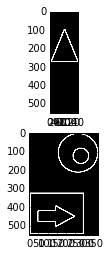

In [19]:
display([image_array[0],image_array[1]])

In [20]:
display([image_array[2],image_array[3]])

IndexError: list index out of range